# Recap

In [207]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
import numpy as np


In [208]:
data = pd.read_csv("cars_recap.csv")

data.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.10000,2548.0,dohc,four,2.68,5000.0,expensive
1,std,front,64.10000,2548.0,dohc,four,2.68,5000.0,expensive
2,std,front,65.50000,2823.0,ohcv,six,3.47,5000.0,expensive
3,std,front,65.88794,2337.0,ohc,four,3.40,5500.0,expensive
4,std,front,66.40000,2824.0,ohc,five,3.40,5500.0,expensive


## Data Preparation

### Duplicate

In [209]:
len(data) # Check number of rows before removing duplicates

205

In [210]:
data = data.drop_duplicates() # Remove duplicates
data.reset_index(inplace=True, drop=True)
data

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.10000,2548.0,dohc,four,2.68,5000.0,expensive
1,std,front,65.50000,2823.0,ohcv,six,3.47,5000.0,expensive
2,std,front,65.88794,2337.0,ohc,four,3.40,5500.0,expensive
3,std,front,66.40000,2824.0,ohc,five,3.40,5500.0,expensive
4,std,front,66.30000,2507.0,ohc,five,3.40,5500.0,expensive
...,...,...,...,...,...,...,...,...,...
186,std,front,68.90000,2952.0,ohc,four,3.15,5400.0,expensive
187,turbo,front,68.80000,3049.0,ohc,four,3.15,5300.0,expensive
188,std,front,68.90000,3012.0,ohcv,six,2.87,5500.0,expensive
189,turbo,front,68.90000,3217.0,ohc,six,3.40,4800.0,expensive


### Missing data

In [211]:
data.isnull().sum().sort_values(ascending=False)/len(data) #NaN percentage for each column

aspiration        0.0
enginelocation    0.0
carwidth          0.0
curbweight        0.0
enginetype        0.0
cylindernumber    0.0
stroke            0.0
peakrpm           0.0
price             0.0
dtype: float64

### Outliers

In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   aspiration      191 non-null    object 
 1   enginelocation  191 non-null    object 
 2   carwidth        191 non-null    float64
 3   curbweight      191 non-null    float64
 4   enginetype      191 non-null    object 
 5   cylindernumber  191 non-null    object 
 6   stroke          191 non-null    float64
 7   peakrpm         191 non-null    float64
 8   price           191 non-null    object 
dtypes: float64(4), object(5)
memory usage: 13.6+ KB


In [213]:
num_cols = ["carwidth", "curbweight", "stroke", "peakrpm"]

<AxesSubplot:>

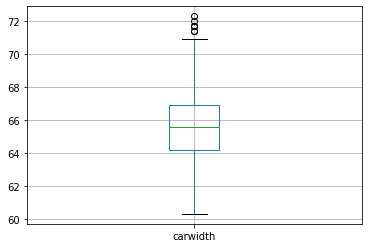

In [214]:
data[["carwidth"]].boxplot()

<AxesSubplot:>

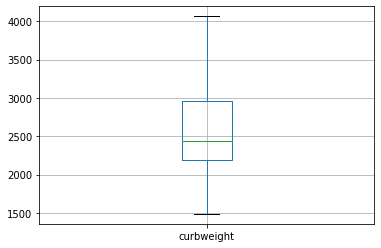

In [215]:
data[["curbweight"]].boxplot()

<AxesSubplot:>

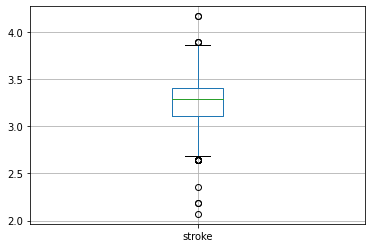

In [216]:
data[["stroke"]].boxplot()

<AxesSubplot:>

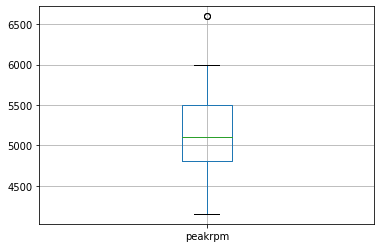

In [217]:
data[["peakrpm"]].boxplot()

### Scaling

In [218]:
r_scaler = RobustScaler() # Instanciate Robust Scaler
r_scaler.fit(data[num_cols]) # Fit scaler to feature
scaling_array = r_scaler.transform(data[num_cols])
scaling_df = pd.DataFrame(scaling_array, columns=num_cols)
scaling_df
data = pd.concat([data.drop(columns=num_cols), scaling_df], axis=1)

In [219]:
data.head()

,aspiration,enginelocation,enginetype,cylindernumber,price,carwidth,curbweight,stroke,peakrpm
0,std,front,dohc,four,expensive,-0.555556,0.135659,-2.033333,-0.142857
1,std,front,ohcv,six,expensive,-0.037037,0.490956,0.600000,-0.142857
2,std,front,ohc,four,expensive,0.106644,-0.136951,0.366667,0.571429
3,std,front,ohc,five,expensive,0.296296,0.492248,0.366667,0.571429
4,std,front,ohc,five,expensive,0.259259,0.082687,0.366667,0.571429


### Encoding

In [220]:
cat_cols = ["aspiration", "enginelocation", "enginetype", "cylindernumber","price"]

In [221]:
for col in cat_cols:
    print(data[col].unique())

['std' 'turbo']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['expensive' 'cheap']


In [222]:
aspiration_encoder = OneHotEncoder(drop='if_binary', sparse = False) # Instanciate encoder for binary feature
aspiration_encoder.fit(data[['aspiration']]) # Fit encoder
data['aspiration'] = aspiration_encoder.transform(data[['aspiration']]) # Encode Street
data.head()

,aspiration,enginelocation,enginetype,cylindernumber,price,carwidth,curbweight,stroke,peakrpm
0,0.0,front,dohc,four,expensive,-0.555556,0.135659,-2.033333,-0.142857
1,0.0,front,ohcv,six,expensive,-0.037037,0.490956,0.600000,-0.142857
2,0.0,front,ohc,four,expensive,0.106644,-0.136951,0.366667,0.571429
3,0.0,front,ohc,five,expensive,0.296296,0.492248,0.366667,0.571429
4,0.0,front,ohc,five,expensive,0.259259,0.082687,0.366667,0.571429


In [223]:
enginelocation_encoder = OneHotEncoder(drop='if_binary', sparse = False) # Instanciate encoder for binary feature
enginelocation_encoder.fit(data[['enginelocation']]) # Fit encoder
data['enginelocation'] = enginelocation_encoder.transform(data[['enginelocation']]) # Encode Street
data.head()

,aspiration,enginelocation,enginetype,cylindernumber,price,carwidth,curbweight,stroke,peakrpm
0,0.0,0.0,dohc,four,expensive,-0.555556,0.135659,-2.033333,-0.142857
1,0.0,0.0,ohcv,six,expensive,-0.037037,0.490956,0.600000,-0.142857
2,0.0,0.0,ohc,four,expensive,0.106644,-0.136951,0.366667,0.571429
3,0.0,0.0,ohc,five,expensive,0.296296,0.492248,0.366667,0.571429
4,0.0,0.0,ohc,five,expensive,0.259259,0.082687,0.366667,0.571429


In [224]:
price_encoder = OneHotEncoder(drop='if_binary', sparse = False) # Instanciate encoder for binary feature
price_encoder.fit(data[['price']]) # Fit encoder
data['price'] = price_encoder.transform(data[['price']]) # Encode Street
data.head()

,aspiration,enginelocation,enginetype,cylindernumber,price,carwidth,curbweight,stroke,peakrpm
0,0.0,0.0,dohc,four,1.0,-0.555556,0.135659,-2.033333,-0.142857
1,0.0,0.0,ohcv,six,1.0,-0.037037,0.490956,0.600000,-0.142857
2,0.0,0.0,ohc,four,1.0,0.106644,-0.136951,0.366667,0.571429
3,0.0,0.0,ohc,five,1.0,0.296296,0.492248,0.366667,0.571429
4,0.0,0.0,ohc,five,1.0,0.259259,0.082687,0.366667,0.571429


In [225]:
cylindernumbers = {'four': 4, 'six': 6, 'five': 5, 'three': 3, 'twelve': 12, 'two': 2, 'eight': 8}
data["cylindernumber"] = data["cylindernumber"].map(cylindernumbers)

In [226]:
data.head()

,aspiration,enginelocation,enginetype,cylindernumber,price,carwidth,curbweight,stroke,peakrpm
0,0.0,0.0,dohc,4,1.0,-0.555556,0.135659,-2.033333,-0.142857
1,0.0,0.0,ohcv,6,1.0,-0.037037,0.490956,0.600000,-0.142857
2,0.0,0.0,ohc,4,1.0,0.106644,-0.136951,0.366667,0.571429
3,0.0,0.0,ohc,5,1.0,0.296296,0.492248,0.366667,0.571429
4,0.0,0.0,ohc,5,1.0,0.259259,0.082687,0.366667,0.571429


In [227]:
enginetype_encoder = OneHotEncoder(sparse = False) # Instanciate encoder
enginetype_encoder.fit(data[['enginetype']]) # Fit encoder
enginetype_array = enginetype_encoder.transform(data[['enginetype']]) # Encode alley
enginetype_array 

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [228]:
enginetype_df = pd.DataFrame(enginetype_array, columns=['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'])
#enginetype_encoder.categories_
enginetype_df

,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
186,0.0,0.0,0.0,1.0,0.0,0.0,0.0
187,0.0,0.0,0.0,1.0,0.0,0.0,0.0
188,0.0,0.0,0.0,0.0,0.0,1.0,0.0
189,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [229]:
data = pd.concat([data.drop(columns=['enginetype']), enginetype_df], axis=1)
data

,aspiration,enginelocation,cylindernumber,price,carwidth,curbweight,stroke,peakrpm,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,0.0,0.0,4,1.0,-0.555556,0.135659,-2.033333,-0.142857,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,6,1.0,-0.037037,0.490956,0.600000,-0.142857,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,4,1.0,0.106644,-0.136951,0.366667,0.571429,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,5,1.0,0.296296,0.492248,0.366667,0.571429,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,5,1.0,0.259259,0.082687,0.366667,0.571429,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,0.0,0.0,4,1.0,1.222222,0.657623,-0.466667,0.428571,0.0,0.0,0.0,1.0,0.0,0.0,0.0
187,1.0,0.0,4,1.0,1.185185,0.782946,-0.466667,0.285714,0.0,0.0,0.0,1.0,0.0,0.0,0.0
188,0.0,0.0,6,1.0,1.222222,0.735142,-1.400000,0.571429,0.0,0.0,0.0,0.0,0.0,1.0,0.0
189,1.0,0.0,6,1.0,1.222222,1.000000,0.366667,-0.428571,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Modeling

In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

y = data['price'] # Encode target
X = data.drop(columns=['price'])# Create feature set
log_reg = LogisticRegression(max_iter=1000) # Instanciate model
scores = cross_val_score(log_reg, X, y, cv=10) # Cross validate
scores.mean()

0.8534210526315789

## Predicting value

In [231]:
car_specificities = ['std', 'front', 65.88793969849246, 1874.0, 'ohc', 'four', 3.11, 5400.0]

column_names = ['aspiration',
 'enginelocation',     
 'carwidth',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'stroke',
 'peakrpm']

new_car = pd.DataFrame(data = [car_specificities], columns = column_names)

new_car
# aspiration, enginelocation, carwidth, curbweight, enginetype, cylindernumber, stroke, peakrpm

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm
0,std,front,65.88794,1874.0,ohc,four,3.11,5400.0


### Preparing new value

In [232]:
new_scaling_array = r_scaler.transform(new_car[num_cols])
new_scaling_df = pd.DataFrame(new_scaling_array, columns=num_cols)
new_scaling_df
new_car = pd.concat([new_car.drop(columns=num_cols), new_scaling_df], axis=1)

In [233]:
new_car

,aspiration,enginelocation,enginetype,cylindernumber,carwidth,curbweight,stroke,peakrpm
0,std,front,ohc,four,0.106644,-0.735142,-0.6,0.428571


In [234]:
new_car['aspiration'] = aspiration_encoder.transform(new_car[['aspiration']])
new_car['enginelocation'] = enginelocation_encoder.transform(new_car[['enginelocation']])
new_car["cylindernumber"] = new_car["cylindernumber"].map(cylindernumbers)
enginetype_array = enginetype_encoder.transform(new_car[['enginetype']])
enginetype_df = pd.DataFrame(enginetype_array, columns=['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'])
new_car = pd.concat([new_car.drop(columns=['enginetype']), enginetype_df], axis=1)
new_car

,aspiration,enginelocation,cylindernumber,carwidth,curbweight,stroke,peakrpm,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,0.0,0.0,4,0.106644,-0.735142,-0.6,0.428571,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Predicting value

In [235]:
model = log_reg.fit(X, y)

In [236]:
model.predict(new_car)

array([0.])